In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras

In [0]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [0]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [0]:
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
input_ = keras.layers.Input(shape = X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs = [input_], outputs = [output])

In [22]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_4[0][0]              

In [0]:
model.compile(loss="mean_squared_error",
              optimizer = keras.optimizers.SGD(lr=1e-3),
              metrics=["mae"])

In [29]:
model_history= model.fit(X_train,y_train,epochs=40,
                         validation_data=(X_valid,y_valid))

Epoch 1/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3034 - mae: 0.3840 - val_loss: 0.3161 - val_mae: 0.3816
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3033 - mae: 0.3834 - val_loss: 0.3351 - val_mae: 0.3866
Epoch 3/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3031 - mae: 0.3837 - val_loss: 0.3165 - val_mae: 0.3809
Epoch 4/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3031 - mae: 0.3834 - val_loss: 0.2947 - val_mae: 0.3807
Epoch 5/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3030 - mae: 0.3832 - val_loss: 0.3093 - val_mae: 0.3831
Epoch 6/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3027 - mae: 0.3836 - val_loss: 0.3162 - val_mae: 0.3814
Epoch 7/40
363/363 [==============================] - 1s 1ms/step - loss: 0.3027 - mae: 0.3831 - val_loss: 0.3014 - val_mae: 0.3804
Epoch 8/40
363/363 [==============================] - 1s 1ms/step - loss: 0.

In [33]:
model_history.params

{'epochs': 40, 'steps': 363, 'verbose': 1}

In [34]:
mae_test = model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 940us/step - loss: 0.3103 - mae: 0.3827


In [35]:
model_history.history

{'loss': [0.3033663034439087,
  0.3032679259777069,
  0.3031320571899414,
  0.3030550479888916,
  0.3030036389827728,
  0.3026753067970276,
  0.3026503324508667,
  0.30235806107521057,
  0.3019903600215912,
  0.30190539360046387,
  0.30182504653930664,
  0.301766037940979,
  0.30135637521743774,
  0.30109477043151855,
  0.3011488616466522,
  0.30104362964630127,
  0.3006712794303894,
  0.30088528990745544,
  0.30044689774513245,
  0.30029311776161194,
  0.30003610253334045,
  0.2997983992099762,
  0.2996404469013214,
  0.2996070683002472,
  0.2993360757827759,
  0.29923492670059204,
  0.2991189956665039,
  0.299096018075943,
  0.2987900674343109,
  0.29863372445106506,
  0.2984253764152527,
  0.29823705554008484,
  0.2981349229812622,
  0.2977520525455475,
  0.2977698743343353,
  0.29763832688331604,
  0.2977755069732666,
  0.29731762409210205,
  0.29702356457710266,
  0.29685723781585693],
 'mae': [0.3839725852012634,
  0.38342174887657166,
  0.3837081491947174,
  0.38339006900787354,

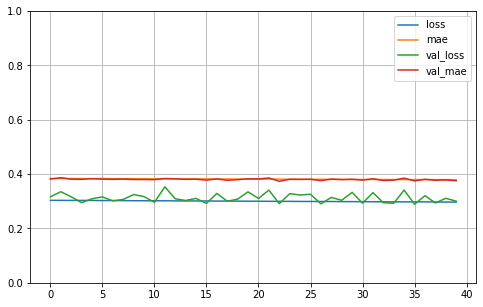

In [36]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()